In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
data = pd.read_csv('/content/drive/MyDrive/csv /diabetes_prediction_dataset_1.csv')

In [ ]:
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,NaN,140.0,0
1,Female,54.0,0,0,NaN,27.32,6.6,80.0,0
2,Male,28.0,0,0,never,27.32,5.7,158.0,0
3,Female,36.0,0,0,current,23.45,5.0,155.0,0
4,Male,76.0,1,1,current,20.14,4.8,155.0,0




```
# Định dạng của đoạn này là mã
```

***1.Tiền xử lý dữ liệu (preprocessing data)***

**Một số thông tin của dataset**

In [ ]:
data.info() #Kiểm tra thông tin cơ bản data: Các giá trị không bị thiếu và loại dữ liệu của mỗi cột


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      99963 non-null   object 
 5   bmi                  99921 non-null   float64
 6   HbA1c_level          99928 non-null   float64
 7   blood_glucose_level  99962 non-null   float64
 8   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 6.9+ MB


Dữ liệu gồm 100000 hàng và 9 cột, data có tổng cộng 7 columns là numerical và 2 columns là catgorial

In [ ]:
data.describe() #thống kê số lượng, trung bình, độ lệch chuẩn, giá trị tối thiểu,
#phân vị và giá trị tối đa của các cột numerical trong Data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,99921.000000,99928.000000,99962.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320408,5.527557,138.056211,0.085000
std,22.516840,0.26315,0.194593,6.638238,1.070591,40.710294,0.278883
min,0.080000,0.00000,0.000000,0.000000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


mean : trung bình.
std : độ lệch chuẩn.
min : giá trị tối thiểu.
25% : phân vị thứ 25.
50%(median) :phân vị thứ 50.
75% :phân vị thứ 75.
max : giá trị tối đa.
Tuổi (Age):

Phân bố tuổi có sự biến động lớn từ trẻ sơ sinh đến người cao tuổi, với độ lệch chuẩn cao (22.52).
Phân vị thứ 25 là 24 tuổi, phân vị thứ 50 (median) là 43 tuổi, và phân vị thứ 75 là 60 tuổi.
Huyết áp cao (Hypertension) và Bệnh tim mạch (Heart Disease):

Cả hai biến đều là biến nhị phân với giá trị trung bình thấp.
Đa số cá nhân trong tập dữ liệu không có huyết áp cao hoặc bệnh tim mạch, nhưng vẫn cần kiểm tra chi tiết hơn về các yếu tố rủi ro và điều trị.
BMI (Body Mass Index):

Trung bình BMI là 27.32, cho thấy một phần lớn cá nhân trong tập dữ liệu có chỉ số BMI cao hơn mức trung bình (25).
Có một sự biến động lớn trong chỉ số BMI, từ trường hợp rất thấp đến rất cao (từ 0 đến 95.69).
Mức độ HbA1c (HbA1c Level) và Mức độ glucose trong máu (Blood Glucose Level):

Cả hai chỉ số này đều cho thấy mức độ biến động đáng kể, với độ lệch chuẩn lớn.
Trung bình HbA1c là 5.53, cho thấy sự kiểm soát đường huyết trung bình tốt.
Trung bình mức độ glucose trong máu là 138.06 mg/dL.
Tiểu đường (Diabetes):

Phân bố tiểu đường trong tập dữ liệu cho thấy tỷ lệ cao (8.5%).
Đa số cá nhân không bị tiểu đường, nhưng tỷ lệ này vẫn đáng quan tâm vì ảnh hưởng lớn đến sức khỏe.

In [ ]:
data.isnull().sum() #Kiểm tra các giá trị NaN

gender                  0
age                     0
hypertension            0
heart_disease           0
smoking_history        37
bmi                    79
HbA1c_level            72
blood_glucose_level    38
diabetes                0
dtype: int64

**Xử lý các giá trị NaN**

In [ ]:
data['smoking_history'].fillna(data['smoking_history'].mode().iloc[0], inplace=True)
data['bmi'].fillna(value=data['bmi'].mean(), inplace=True)
data['HbA1c_level'].fillna(value=data['HbA1c_level'].mean(), inplace=True)
data['blood_glucose_level'].fillna(value=data['blood_glucose_level'].mean(), inplace=True)




*   fillna() với mode (phần tử xuất hiện nhiều nhất) cho 'smoking_history'.
*   fillna() với giá trị trung bình (mean()) cho 'bmi', 'HbA1c_level', và 'blood_glucose_level'.


In [ ]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,5.527557,140.000000,0
1,Female,54.0,0,0,No Info,27.32,6.600000,80.000000,0
2,Male,28.0,0,0,never,27.32,5.700000,158.000000,0
3,Female,36.0,0,0,current,23.45,5.000000,155.000000,0
4,Male,76.0,1,1,current,20.14,4.800000,155.000000,0
5,Female,20.0,0,0,never,27.32,6.600000,85.000000,0
6,Female,44.0,0,0,never,19.31,6.500000,200.000000,1
7,Female,79.0,0,0,No Info,23.86,5.700000,138.056211,0
8,Male,42.0,0,0,never,33.64,4.800000,145.000000,0
9,Female,32.0,0,0,never,27.32,5.000000,100.000000,0


***2. Visualization data*** <Trực quan hóa dữ liệu>

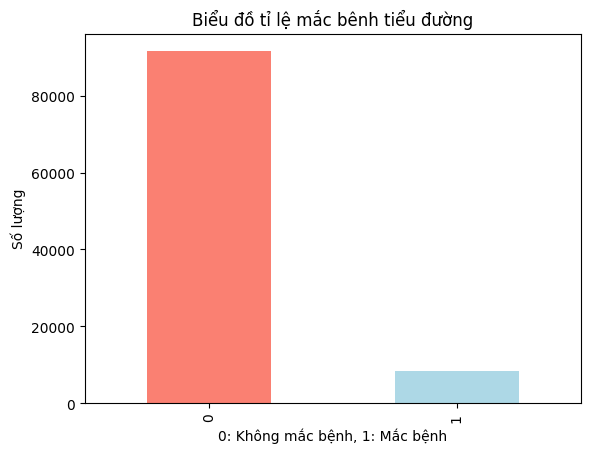

In [ ]:
d_eda = data.copy()

d_eda['diabetes'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.title('Biểu đồ tỉ lệ mắc bênh tiểu đường')
plt.xlabel('0: Không mắc bệnh, 1: Mắc bệnh')
plt.ylabel('Số lượng')
plt.show()


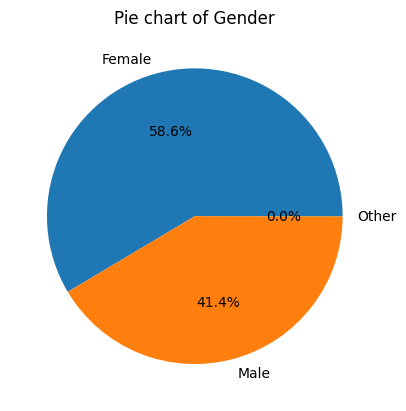

In [ ]:
plt.pie(d_eda['gender'].value_counts(),labels=d_eda['gender'].value_counts().index,autopct='%1.1f%%')
plt.title('Pie chart of Gender')
plt.show()

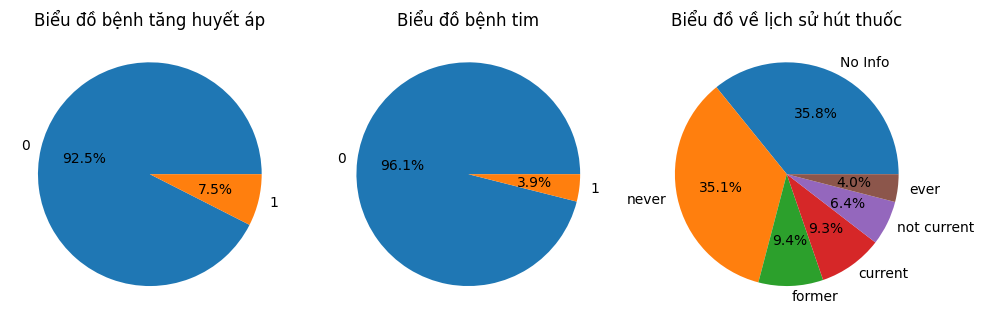

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(10,8))
axes[0].pie(d_eda['hypertension'].value_counts(),labels=d_eda['hypertension'].value_counts().index,autopct='%1.1f%%')
axes[0].set_title('Biểu đồ bệnh tăng huyết áp')
axes[1].pie(d_eda['heart_disease'].value_counts(),labels=d_eda['heart_disease'].value_counts().index,autopct='%1.1f%%')
axes[1].set_title('Biểu đồ bệnh tim')
axes[2].pie(d_eda['smoking_history'].value_counts(),labels=d_eda['smoking_history'].value_counts().index,autopct='%1.1f%%')
axes[2].set_title('Biểu đồ về lịch sử hút thuốc')
plt.tight_layout()
plt.show()

Trong tập dữ liệu ta thấy:
- Bệnh tăng huyết áp có tỷ lệ mắc là 7.5% (tương đương 7.500/100.000 người) đây là 1 tỷ lệ mắc bệnh được coi là tương đối cao. Đặc biệt người mắc bệnh tăng huyết áp thường có nguy cơ cao hơn để phát triển bệnh tiểu đường loại 2.
- Bệnh tim mặc dù 3.5% không phải là một tỷ lệ mắc bệnh rất cao so với một số loại bệnh khác nhưng bệnh tim có thể dẫn đến sự phát triển của các bệnh lý khác như tiểu đường ...
- Biểu đồ lịch sử hút thuốc cho ta thấy có 35.1% (35.100 người) chưa từng hút thuốc,9.4%(9.400 người) đã ngưng hút thuốc  đây là một con số đáng mừng nhưng vẫn có 9.3% (9.300 người) vẫn đang hút thuốc đây là một tỷ lệ khá cao. Hút thuốc làm tăng nguy cơ phát triển bệnh tiểu đường loại 2.

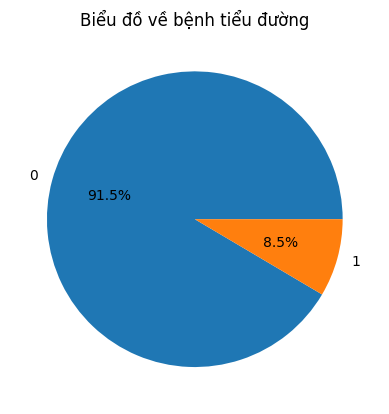

In [ ]:
plt.pie(d_eda['diabetes'].value_counts(),labels=d_eda['diabetes'].value_counts().index,autopct='%1.1f%%')
plt.title('Biểu đồ về bệnh tiểu đường')
plt.show()

Với 8.5% trong số 100,000 người mắc bệnh tiểu đường, tỷ lệ này có thể được coi là khá cao. Điều này cho thấy bệnh tiểu đường là một vấn đề sức khỏe quan trọng đối với cộng đồng.

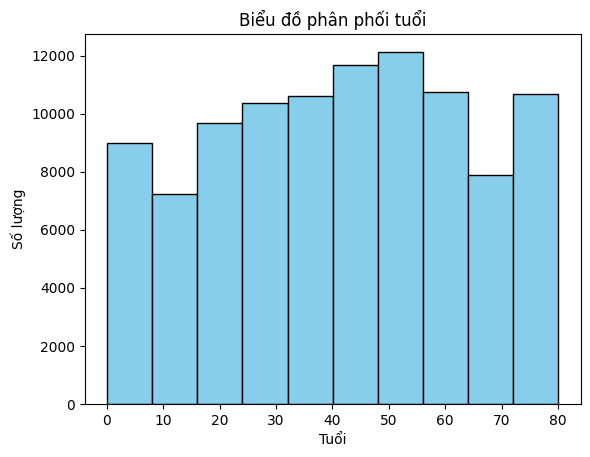

In [ ]:
plt.hist(d_eda['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Biểu đồ phân phối tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.show()

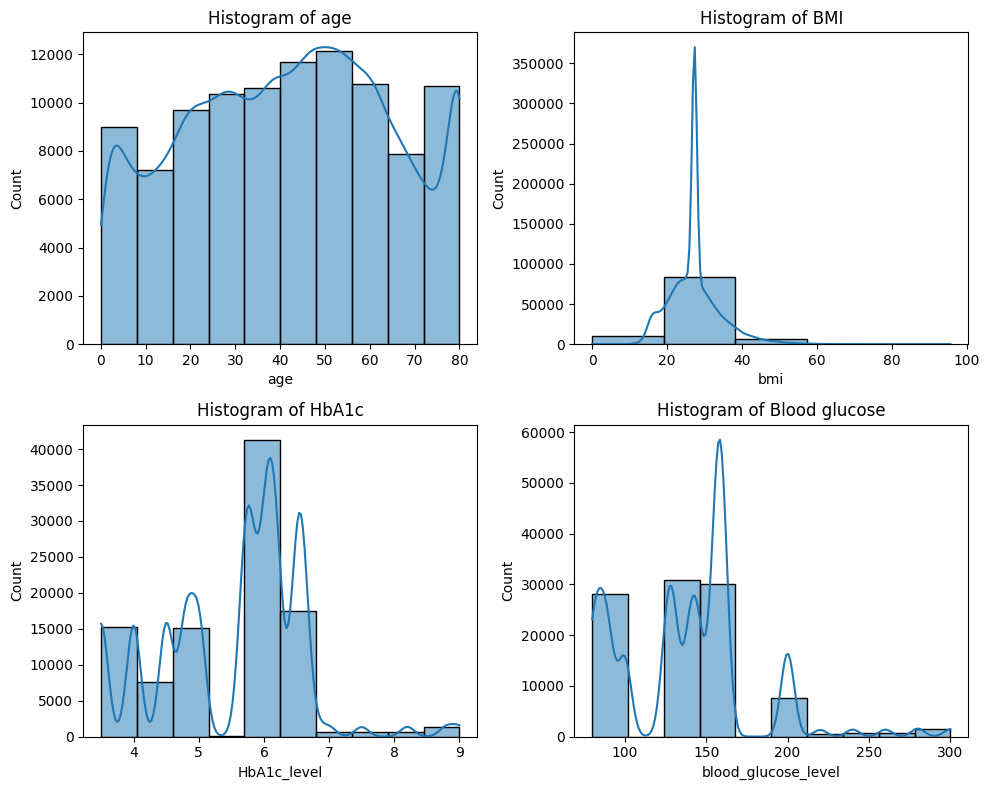

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.histplot(d_eda['age'],bins=10,kde=True,ax=axes[0,0])
axes[0,0].set_title('Histogram of age')
sns.histplot(d_eda['bmi'],bins=5,kde=True,ax=axes[0,1])
axes[0,1].set_title('Histogram of BMI')
sns.histplot(d_eda['HbA1c_level'],bins=10,kde=True,ax=axes[1,0])
axes[1,0].set_title('Histogram of HbA1c')
sns.histplot(d_eda['blood_glucose_level'],bins=10,kde=True,ax=axes[1,1])
axes[1,1].set_title('Histogram of Blood glucose')
plt.tight_layout()
plt.show()

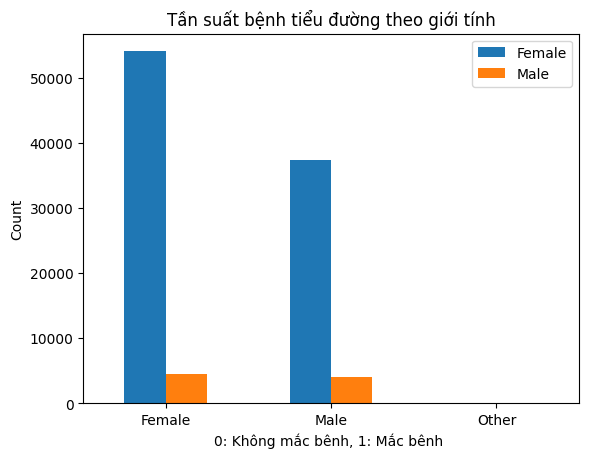

In [ ]:
# Tỷ lệ mắc bệnh theo giới tính.
pd.crosstab(d_eda['gender'], d_eda['diabetes'])
(4461/(54091+4461)),(4039/(37391+4039)) #tỷ lệ nam bị mắc nhiều hơn nữ.

pd.crosstab(d_eda['gender'], d_eda['diabetes']).plot(kind='bar');
plt.title('Tần suất bệnh tiểu đường theo giới tính')
plt.xlabel('0: Không mắc bênh, 1: Mắc bênh ')
plt.ylabel('Count')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);



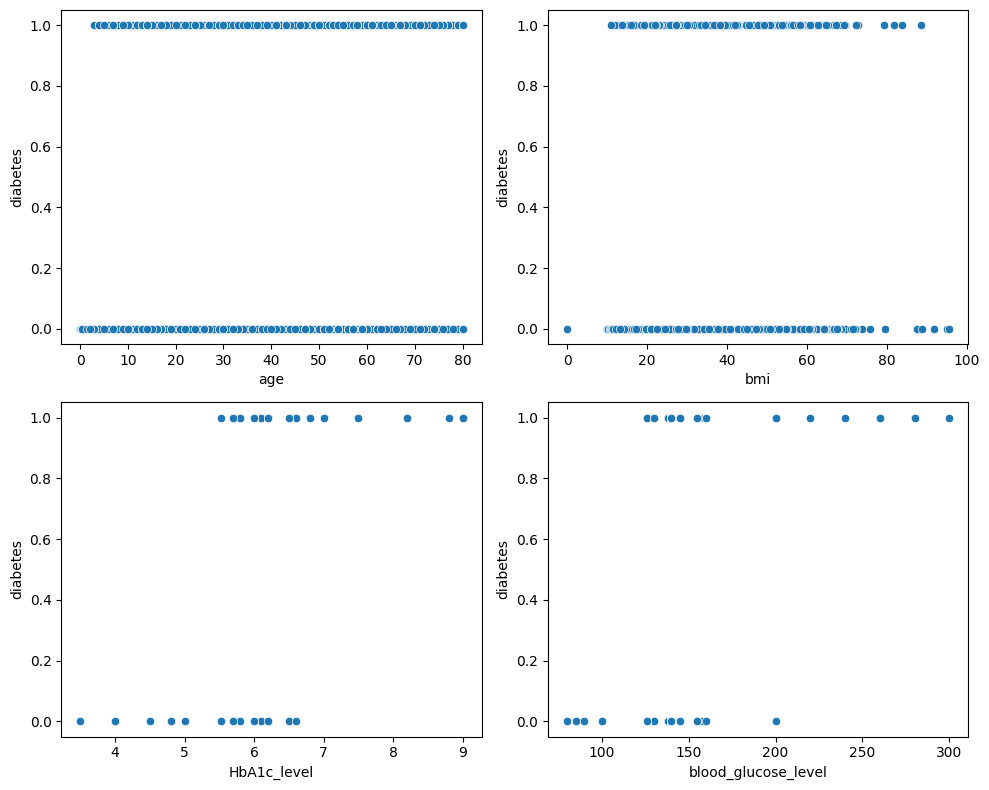

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
sns.scatterplot(data=d_eda,x='age',y='diabetes',ax=axes[0,0])
sns.scatterplot(data=d_eda,x='bmi',y='diabetes',ax=axes[0,1])
sns.scatterplot(data=d_eda,x='HbA1c_level',y='diabetes',ax=axes[1,0])
sns.scatterplot(data=d_eda,x='blood_glucose_level',y='diabetes',ax=axes[1,1])
plt.tight_layout()
plt.show()

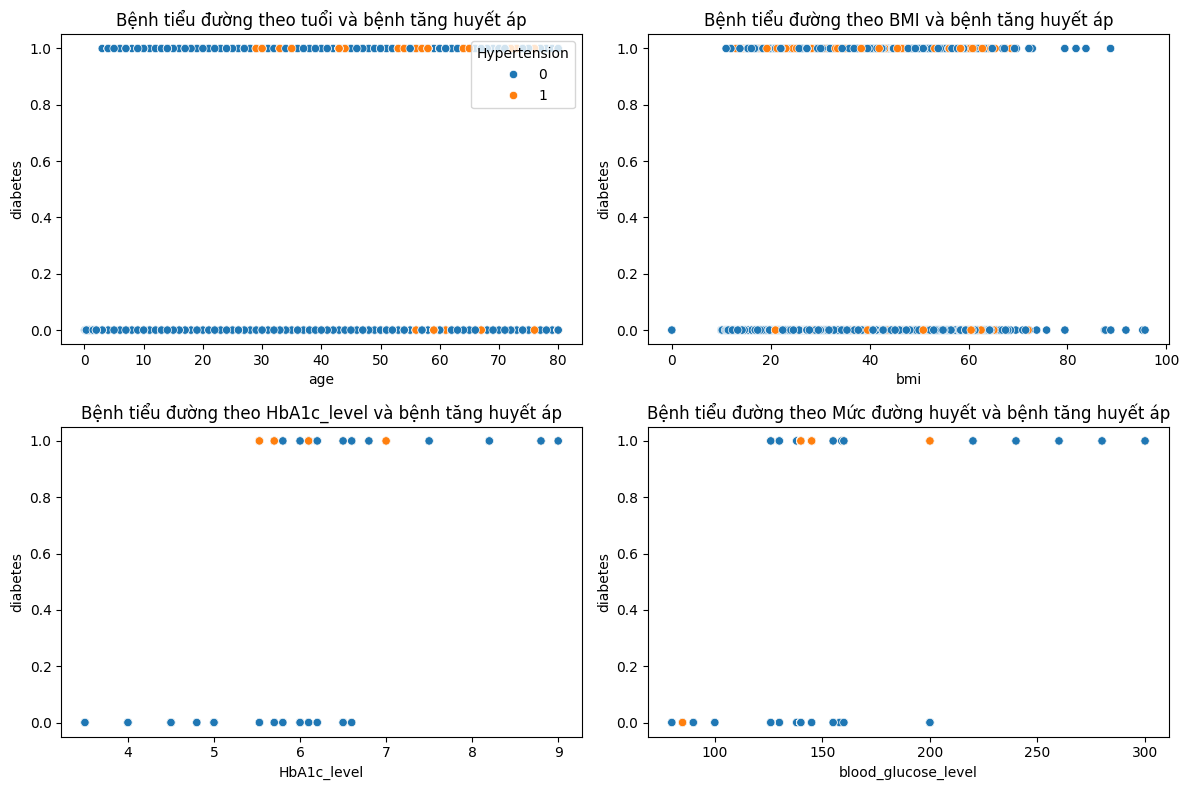

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.scatterplot(data=d_eda, x='age', y='diabetes', hue='hypertension', ax=axes[0, 0], legend='brief')
axes[0, 0].set_title('Bệnh tiểu đường theo tuổi và bệnh tăng huyết áp')
axes[0, 0].legend(title='Hypertension', loc='upper right')

sns.scatterplot(data=d_eda, x='bmi', y='diabetes', hue='hypertension', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Bệnh tiểu đường theo BMI và bệnh tăng huyết áp')

sns.scatterplot(data=d_eda, x='HbA1c_level', y='diabetes', hue='hypertension', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Bệnh tiểu đường theo HbA1c_level và bệnh tăng huyết áp')

sns.scatterplot(data=d_eda, x='blood_glucose_level', y='diabetes', hue='hypertension', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Bệnh tiểu đường theo Mức đường huyết và bệnh tăng huyết áp')

plt.tight_layout()
plt.show()

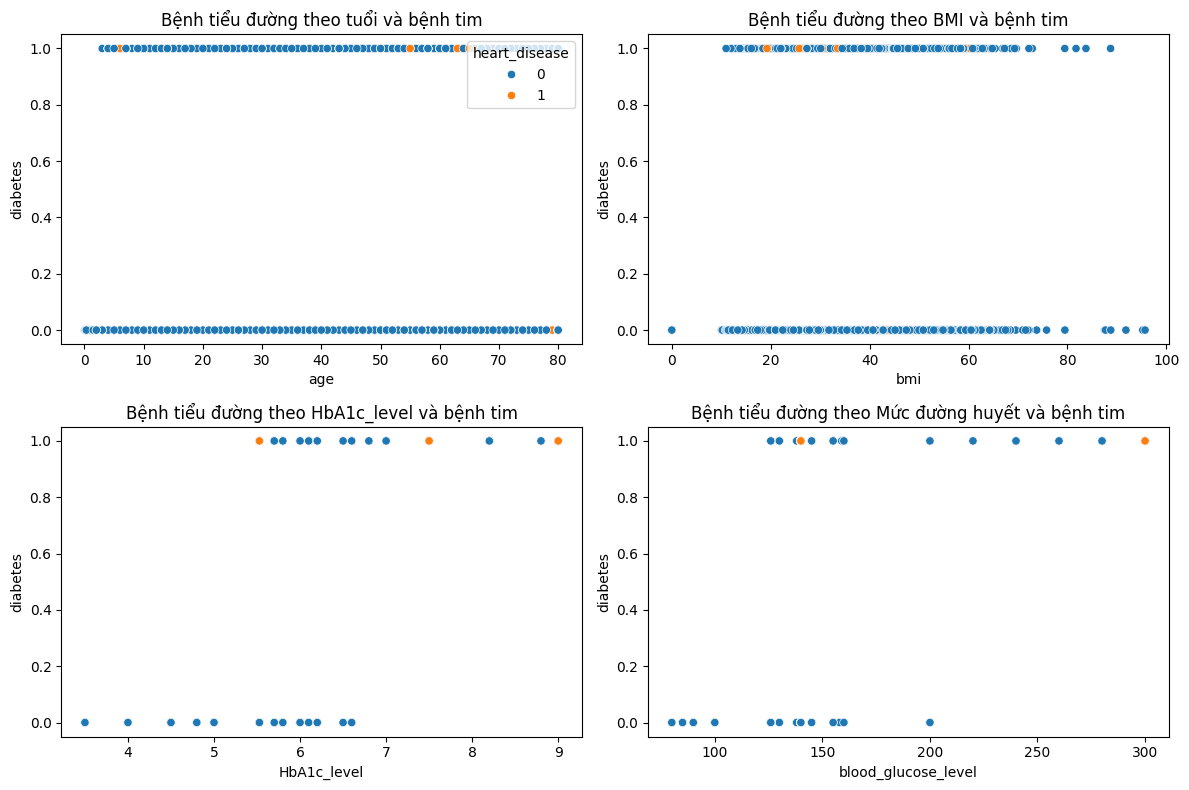

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.scatterplot(data=d_eda, x='age', y='diabetes', hue='heart_disease', ax=axes[0, 0], legend='brief')
axes[0, 0].set_title('Bệnh tiểu đường theo tuổi và bệnh tim')
axes[0, 0].legend(title='heart_disease', loc='upper right')

sns.scatterplot(data=d_eda, x='bmi', y='diabetes', hue='heart_disease', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Bệnh tiểu đường theo BMI và bệnh tim')

sns.scatterplot(data=d_eda, x='HbA1c_level', y='diabetes', hue='heart_disease', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Bệnh tiểu đường theo HbA1c_level và bệnh tim')

sns.scatterplot(data=d_eda, x='blood_glucose_level', y='diabetes', hue='heart_disease', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Bệnh tiểu đường theo Mức đường huyết và bệnh tim')

plt.tight_layout()
plt.show()

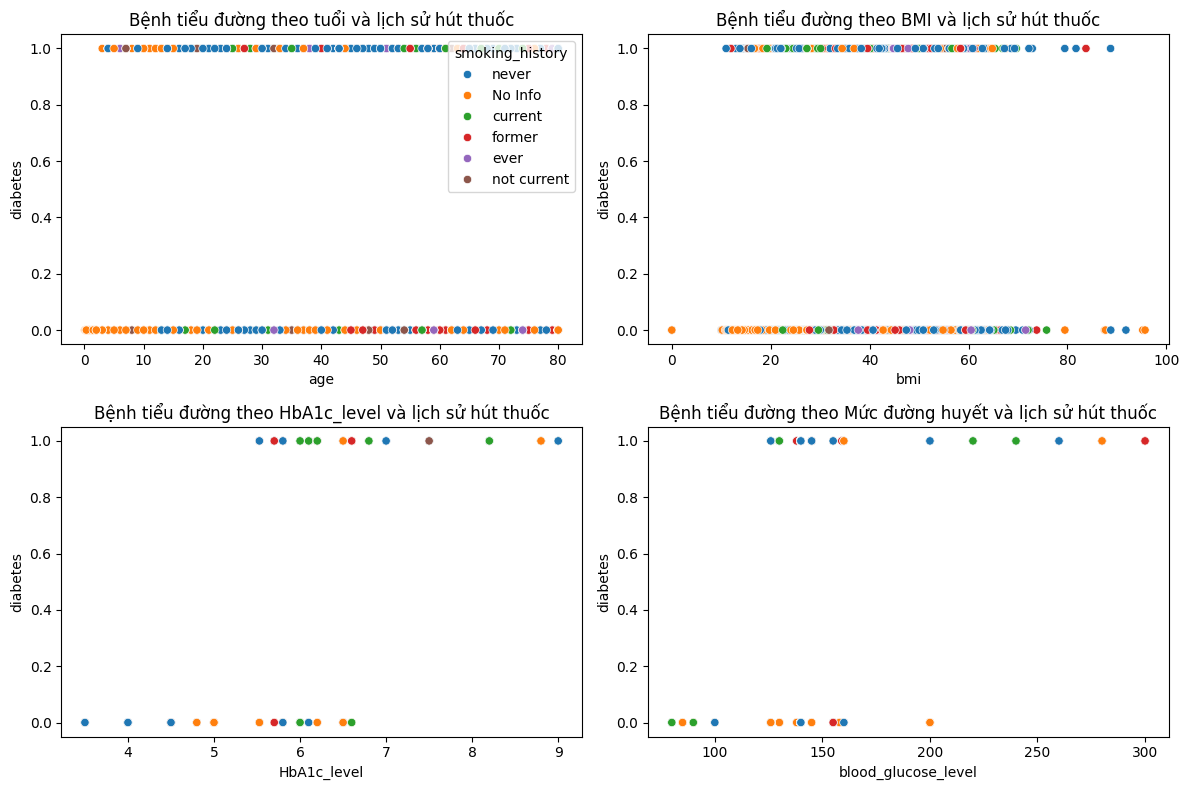

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.scatterplot(data=d_eda, x='age', y='diabetes', hue='smoking_history', ax=axes[0, 0], legend='brief')
axes[0, 0].set_title('Bệnh tiểu đường theo tuổi và lịch sử hút thuốc')
axes[0, 0].legend(title='smoking_history', loc='upper right')

sns.scatterplot(data=d_eda, x='bmi', y='diabetes', hue='smoking_history', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Bệnh tiểu đường theo BMI và lịch sử hút thuốc')

sns.scatterplot(data=d_eda, x='HbA1c_level', y='diabetes', hue='smoking_history', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Bệnh tiểu đường theo HbA1c_level và lịch sử hút thuốc')

sns.scatterplot(data=d_eda, x='blood_glucose_level', y='diabetes', hue='smoking_history', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Bệnh tiểu đường theo Mức đường huyết và lịch sử hút thuốc')

plt.tight_layout()
plt.show()

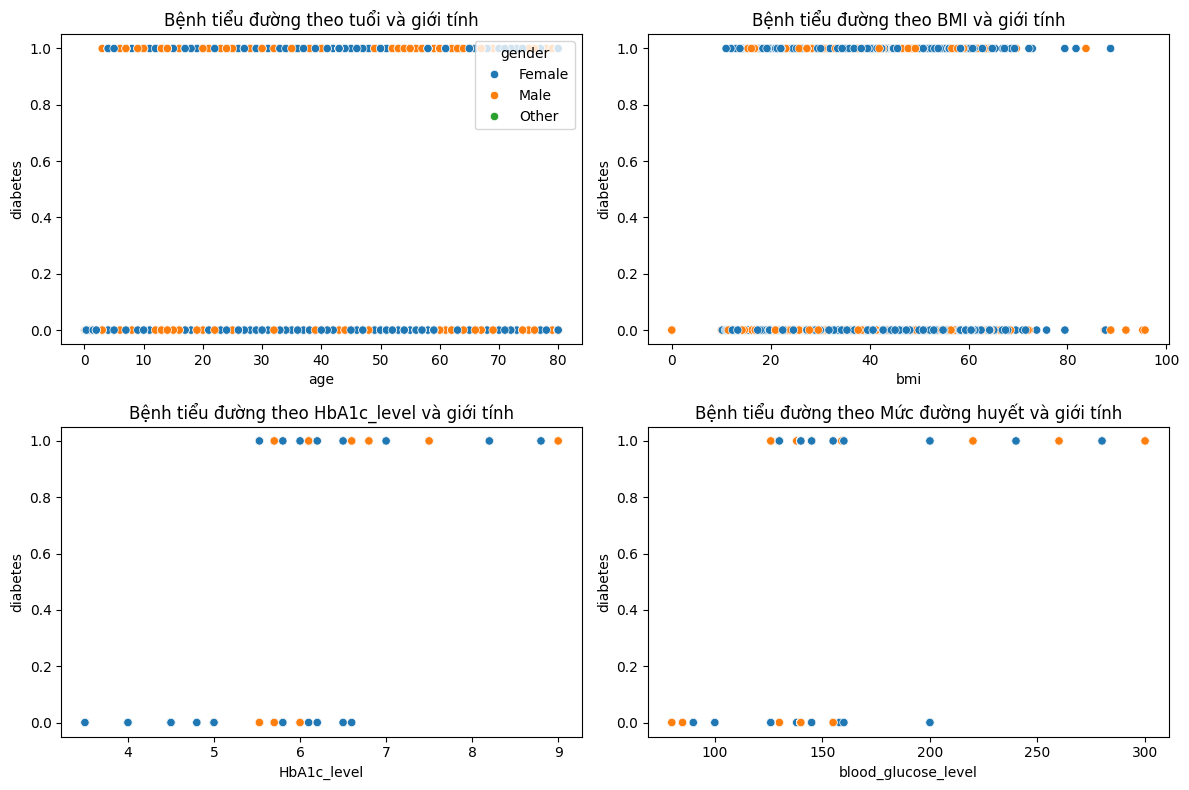

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.scatterplot(data=d_eda, x='age', y='diabetes', hue='gender', ax=axes[0, 0], legend='brief')
axes[0, 0].set_title('Bệnh tiểu đường theo tuổi và giới tính')
axes[0, 0].legend(title='gender', loc='upper right')

sns.scatterplot(data=d_eda, x='bmi', y='diabetes', hue='gender', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Bệnh tiểu đường theo BMI và giới tính')

sns.scatterplot(data=d_eda, x='HbA1c_level', y='diabetes', hue='gender', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Bệnh tiểu đường theo HbA1c_level và giới tính')

sns.scatterplot(data=d_eda, x='blood_glucose_level', y='diabetes', hue='gender', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Bệnh tiểu đường theo Mức đường huyết và giới tính')

plt.tight_layout()
plt.show()

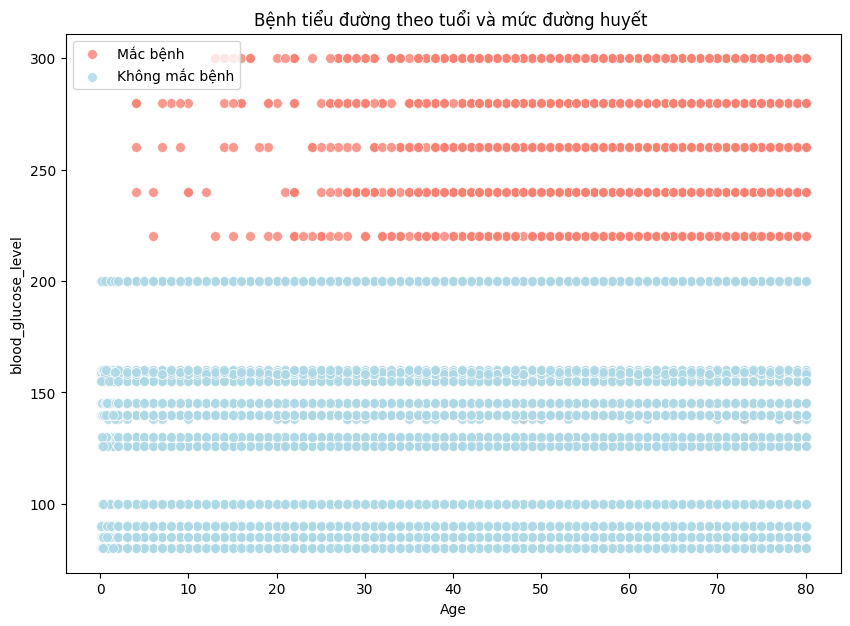

In [ ]:
plt.figure(figsize=(10, 7))

# positive cases
sns.scatterplot(data = d_eda, x=d_eda.age[d_eda.diabetes==1], y = d_eda.blood_glucose_level[d_eda.diabetes==1], color='salmon', s=50, alpha=0.8);

# negative cases
sns.scatterplot(data = d_eda, x=d_eda.age[d_eda.diabetes==0], y = d_eda.blood_glucose_level[d_eda.diabetes==0], color='lightblue', s=50, alpha=0.8)

plt.title('Bệnh tiểu đường theo tuổi và mức đường huyết ')
plt.xlabel('Age')
plt.ylabel('blood_glucose_level');
plt.legend(['Mắc bệnh', 'Không mắc bệnh']);

**Nhận xét:**
- Những người có mức đường huyết trong máu từ 100 - 200 thường không bị mắc bênh tiểu đường
- Những người có mức đường huyết trong máu cao hơn 200 có tỷ lệ mắc bệnh tiểu đường rất cao.
- Người mắc tiểu đường có ở mọi độ tuổi nhưng tỷ lệ mắc bênh cao ở khoảng trên 25 tuổi.


***3. Label Encoding và One-Hot Encoding *** < biến đổi các biến phân loại thành dạng số>

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])

Chuẩn hóa gender về dạng 0 (nữ), 1 (nam)

In [ ]:
# Khởi tạo bộ mã hóa One-Hot Encoder
one_hot_encoder = OneHotEncoder()

# Fit và transform dữ liệu
one_hot_encoded = one_hot_encoder.fit_transform(data[['smoking_history']])

# Chuyển kết quả thành dataframe
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(['smoking_history']))

# Đổi tên cột của dataframe mã hóa thành tên tương ứng với dữ liệu trong cột ban đầu
new_column_names = data['smoking_history'].unique()
one_hot_encoded_df.columns = new_column_names

# Kết hợp kết quả với dataframe ban đầu
data = pd.concat([data, one_hot_encoded_df], axis=1)
data = data.drop('smoking_history', axis=1)



In [ ]:
data['age'] = (data['age'] - data['age'].min()) / (data['age'].max() - data['age'].min()) #chuẩn hóa về khoảng từ 0 đến 1

In [ ]:
for column in ['bmi', 'HbA1c_level', 'blood_glucose_level']:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min()) #chuẩn hóa về khoảng từ 0 đến 1

In [ ]:
print(data)

       gender       age  hypertension  heart_disease       bmi  HbA1c_level  \
0           0  1.000000             0              1  0.263246     0.368647   
1           0  0.674675             0              0  0.285505     0.563636   
2           1  0.349349             0              0  0.285505     0.400000   
3           0  0.449449             0              0  0.245062     0.272727   
4           1  0.949950             1              1  0.210471     0.236364   
...       ...       ...           ...            ...       ...          ...   
99995       0  1.000000             0              0  0.285505     0.490909   
99996       0  0.024024             0              0  0.181524     0.545455   
99997       1  0.824825             0              0  0.290835     0.400000   
99998       0  0.299299             0              0  0.370154     0.090909   
99999       0  0.712212             0              0  0.234403     0.563636   

       blood_glucose_level  diabetes  never  No Inf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
# Chia dữ liệu thành features (đặc trưng) và target (mục tiêu)
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=2)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)


In [ ]:
best_rf_model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                        max_depth=grid_search.best_params_['max_depth'],
                                        min_samples_split=grid_search.best_params_['min_samples_split'],
                                        min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                        random_state=42)


In [ ]:
best_rf_model.fit(X_train, y_train)


In [ ]:
# Đánh giá hiệu suất của mô hình trên tập kiểm tra
accuracy = best_rf_model.score(X_test, y_test)
print("Accuracy of Random Forest model:", accuracy)

Accuracy of Random Forest model: 0.97005


In [ ]:
from sklearn.metrics import classification_report

# Dự đoán trên tập kiểm tra
y_pred = best_rf_model.predict(X_test)

# Tạo báo cáo đánh giá tổng quan
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



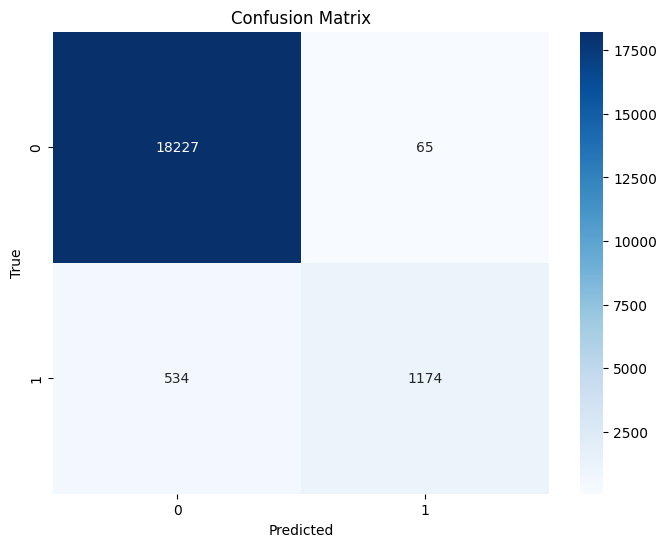

In [ ]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve

# Dự đoán xác suất thuộc lớp 1 từ mô hình (ví dụ: RandomForestClassifier)
y_probabilities =best_rf_model.predict_proba(X_test)[:, 1]

# Tính AUC-ROC
auc_roc = roc_auc_score(y_test, y_probabilities)

# Tính Precision-Recall Curve và AUC-PR
precision, recall, thresholds = precision_recall_curve(y_test, y_probabilities)
auc_pr = auc(recall, precision)

print("AUC-ROC:", auc_roc)
print("AUC-PR:", auc_pr)


AUC-ROC: 0.9628976956435569
AUC-PR: 0.8626832989889602


AUC-ROC (Area Under the Receiver Operating Characteristic Curve):
Ý nghĩa: AUC-ROC đo lường khả năng của mô hình phân loại phân biệt giữa hai lớp: tích cực (positive) và tiêu cực (negative). Đường ROC biểu diễn tỷ lệ giữa tỷ lệ True Positive Rate (TPR) và tỷ lệ False Positive Rate (FPR) khi ngưỡng quyết định thay đổi.
AUC-PR (Area Under the Precision-Recall Curve):
Ý nghĩa: AUC-PR đo lường khả năng của mô hình phân loại trong việc phân loại các mẫu dương tích cực một cách chính xác. Đường Precision-Recall biểu diễn tỷ lệ giữa tỷ lệ Precision và tỷ lệ Recall khi ngưỡng quyết định thay đổi.